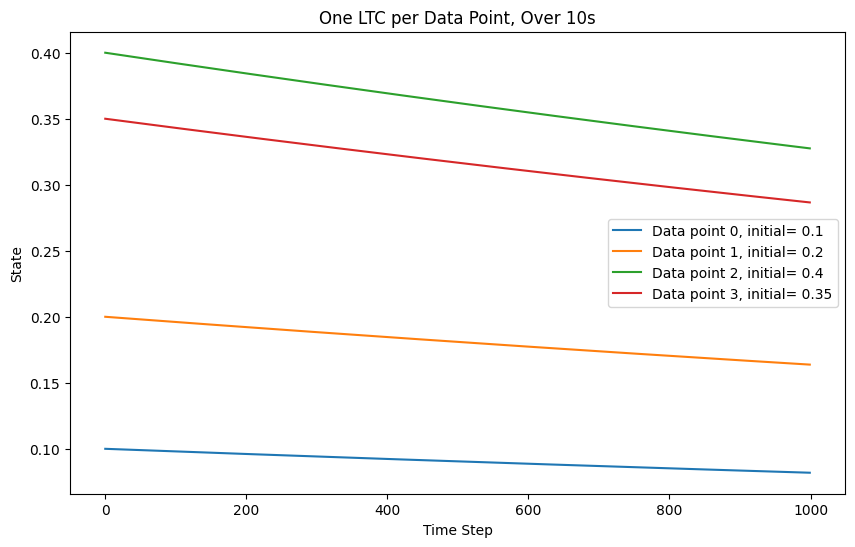

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def store_series_in_ltc(data_points, tau=50.0, dt=0.01, total_time=10.0):
    """
    data_points: the series we want to store
    We'll create len(data_points) LTC states,
    each 'loaded' with one data point at t=0, then we let them decay for total_time.
    """
    n = len(data_points)
    time_steps = int(total_time/dt)
    # LTC array: shape = (time_steps, n)
    h = np.zeros((time_steps, n))
    
    # At t=0, we set each LTC's state to data_points[i]
    h[0,:] = data_points
    
    for t in range(1, time_steps):
        for i in range(n):
            # No new input, just decay
            dh = (1.0/tau)* (0.0 - h[t-1,i]) * dt
            h[t,i] = h[t-1,i] + dh
    
    return h

# Example usage
data_points = np.array([0.1, 0.2, 0.4, 0.35])  # some short series
ltc_states = store_series_in_ltc(data_points, tau=50.0)

# Plot LTC states
plt.figure(figsize=(10,6))
for i in range(len(data_points)):
    plt.plot(ltc_states[:, i], label=f"Data point {i}, initial= {data_points[i]}")
plt.title("One LTC per Data Point, Over 10s")
plt.xlabel("Time Step")
plt.ylabel("State")
plt.legend()
plt.show()